<a href="https://colab.research.google.com/github/pari1jay/CTCproject/blob/main/Chicago_Transit_Centre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Transit Authority (CTA) station ridership statistics


This data represents Chicago Transit Authority (CTA) station ridership statistics for different stations:

**This data includes:**

1. Station Name & ID: Each row corresponds to a different CTA station, identified by station_id and stationame.

2. Date (month_beginning): The ridership corresponds to 2001-2024 data.

3. Average Ridership Per Day Type:

avg_weekday_rides: The average number of people using the station on weekdays.
avg_saturday_rides: The average number of people using the station on Saturdays.
avg_sunday-holiday_rides: The average number of people using the station on Sundays and holidays.

4. Total Monthly Ridership (monthtotal): The total number of rides recorded at each station for the entire month.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
df= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/CTA_Ridership.csv')
df.tail()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
41057,40850,Library,12/01/2024,1621.4,1053.0,721.2,42589
41058,40680,Adams/Wabash,12/01/2024,3134.2,1966.5,1243.8,81147
41059,41700,Washington/Wabash,12/01/2024,5508.7,4567.0,2996.8,151932
41060,40260,State/Lake,12/01/2024,6460.0,5634.8,3651.5,180109
41061,40380,Clark/Lake,12/01/2024,8508.9,5191.3,3640.5,221294


# Check data structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41062 entries, 0 to 41061
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station_id                41062 non-null  int64  
 1   stationame                41062 non-null  object 
 2   month_beginning           41062 non-null  object 
 3   avg_weekday_rides         41062 non-null  float64
 4   avg_saturday_rides        41062 non-null  float64
 5   avg_sunday-holiday_rides  41062 non-null  float64
 6   monthtotal                41062 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


🔍 Observations from df.info():\
month_beginning is stored as an object (string) → Convert it to datetime for time-based analysis.\
stationame has a typo → Rename it to station_name for consistency.\
No missing values → No need for imputation.\
Data types are appropriate for numerical analysis

In [ ]:
df.isnull().sum()

,0
station_id,0
stationame,0
month_beginning,0
avg_weekday_rides,0
avg_saturday_rides,0
avg_sunday-holiday_rides,0
monthtotal,0


##Some simple data-preprocessing

In [ ]:
df["month_beginning"] = pd.to_datetime(df["month_beginning"])
df.rename(columns={"stationame": "station_name", "monthtotal": "monthly_ridership"}, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41062 entries, 0 to 41061
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_id                41062 non-null  int64         
 1   station_name              41062 non-null  object        
 2   month_beginning           41062 non-null  datetime64[ns]
 3   avg_weekday_rides         41062 non-null  float64       
 4   avg_saturday_rides        41062 non-null  float64       
 5   avg_sunday-holiday_rides  41062 non-null  float64       
 6   monthly_ridership         41062 non-null  int64         
 7   year                      41062 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(1)
memory usage: 2.3+ MB



# What We Can Learn from This data: BASIC EDA
1. **Comparing Station Usage**: Howard Station (ID 40900) has the highest weekday ridership (6233.9), while Jarvis Station (ID 41190) has significantly lower weekday ridership (1489.1).

2. **Weekend vs. Weekday Patterns**: Ridership is generally lower on weekends and holidays compared to weekdays.

3. **Transit Demand**: Stations with high weekday averages are likely key commuter hubs, whereas stations with lower averages might be in residential areas with fewer commuters.


## Comparing Station Usage

In [ ]:
unique_stations=df["station_name"].unique()
num_stations = df["station_name"].nunique()
print(f"Total stations are: {num_stations}")
unique_stations

Total stations are: 149


array(['Howard', 'Jarvis', 'Morse', 'Loyola', 'Granville', 'Thorndale',
       'Bryn Mawr', 'Berwyn', 'Argyle', 'Lawrence', 'Wilson', 'Sheridan',
       'Addison-North Main', 'Belmont-North Main', 'Fullerton',
       'North/Clybourn', 'Clark/Division', 'Chicago/State', 'Grand/State',
       'Lake/State', 'Washington/State', 'Monroe/State', 'Jackson/State',
       'Harrison', 'Roosevelt', 'Cermak-Chinatown', 'Sox-35th-Dan Ryan',
       '47th-Dan Ryan', 'Garfield-Dan Ryan', '63rd-Dan Ryan', '69th',
       '79th', '87th', '95th/Dan Ryan', 'Linden', 'Central-Evanston',
       'Noyes', 'Foster', 'Davis', 'Dempster', 'Main', 'South Boulevard',
       'Skokie', "O'Hare Airport", 'Rosemont', 'Cumberland',
       "Harlem-O'Hare", 'Jefferson Park', "Montrose-O'Hare",
       "Irving Park-O'Hare", "Addison-O'Hare", "Belmont-O'Hare",
       'Logan Square', 'California/Milwaukee', 'Western/Milwaukee',
       'Damen/Milwaukee', 'Division/Milwaukee', 'Chicago/Milwaukee',
       'Grand/Milwaukee', 'Was



Out of 149 stations as seen above which are some of the busiest stations?
🔍
1. Lake/State and Clark/Lake are the most used stations, exceeding 100M riders.
2. Chicago/State, Belmont-North Main, and Fullerton also have high foot traffic.
3. O’Hare Airport is in the top 10, showing strong transit use to/from the airport.
4. Downtown stations (Lake/State, Clark/Lake, Grand/State, Jackson/State) dominate ridership.

In [ ]:
df.groupby("station_name")["monthly_ridership"].sum().sort_values(ascending=False).head(10)

,monthly_ridership
station_name,
Lake/State,110785786
Clark/Lake,108465476
Chicago/State,99751808
Belmont-North Main,81706561
Fullerton,80615573
95th/Dan Ryan,78983048
O'Hare Airport,75601233
Grand/State,75077424
Roosevelt,68871487


The below code allows users to select a year and automatically plots the top 10 stations based on the monthly ridership for that year.

In [ ]:

import seaborn as sns
import ipywidgets as widgets
import IPython.display as display

#df_sort=df.sort_values(by= "month_beginning", ascending=False)
#df["month_beginning"] =  pd.to_datetime(df["month_beginning"])
df["year"] = df["month_beginning"].dt.year

year_selector = widgets.Dropdown(
    options=sorted(df["year"].unique()),
    descriptinos="Select Year:",
    style={'description_width': 'initial'}
)

def plot_ridership(selected_year):

  filter_df = df[df["year"]==selected_year]
  sr=filter_df.groupby("station_name")["monthly_ridership"].sum().reset_index()
  top10_st=sr.nlargest(10, "monthly_ridership")


  sns.set_style("whitegrid")
  plt.figure(figsize=(18,6))
  sns.barplot(x="station_name", y="monthly_ridership", data= top10_st)#, palette="Blues_r")
  plt.xticks(rotation=45)
  plt.xlabel("Top 10 Station Name for the selected year")
  plt.ylabel("Monthly Ridership")
  plt.title(f"Total Monthly Ridership per station({selected_year})")
  plt.show()

widgets.interactive(plot_ridership, selected_year= year_selector)

interactive(children=(Dropdown(description='selected_year', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007,…

## Weekend vs. Weekday Patterns

## Transit demand

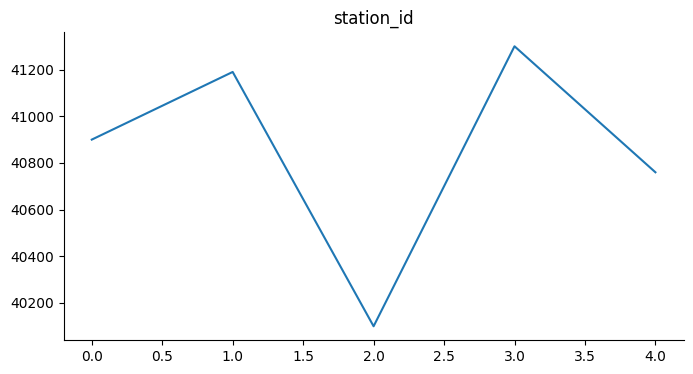

In [ ]:
from matplotlib import pyplot as plt
_df_9['station_id'].plot(kind='line', figsize=(8, 4), title='station_id')
plt.gca().spines[['top', 'right']].set_visible(False)

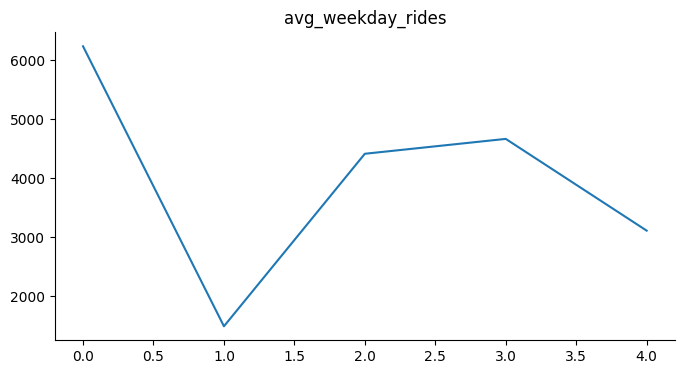

In [ ]:
from matplotlib import pyplot as plt
_df_10['avg_weekday_rides'].plot(kind='line', figsize=(8, 4), title='avg_weekday_rides')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df2= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/CTA_System_Information.csv')
df2.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30082,E,Cicero (Loop-bound),Cicero,Cicero (Pink Line),40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)"
1,30151,E,Central Park (Loop-bound),Central Park,Central Park (Pink Line),40780,True,False,False,False,False,False,False,False,True,False,"(41.853839, -87.714842)"
2,30184,W,Halsted/63rd (Ashland-bound),Halsted,Halsted (Green Line),40940,True,False,False,True,False,False,False,False,False,False,"(41.778943, -87.644244)"
3,30044,N,Cumberland (O'Hare-bound),Cumberland,Cumberland (Blue Line),40230,True,False,True,False,False,False,False,False,False,False,"(41.984246, -87.838028)"
4,30092,E,Racine (O'Hare-bound),Racine,Racine (Blue Line),40470,False,False,True,False,False,False,False,False,False,False,"(41.87592, -87.659458)"


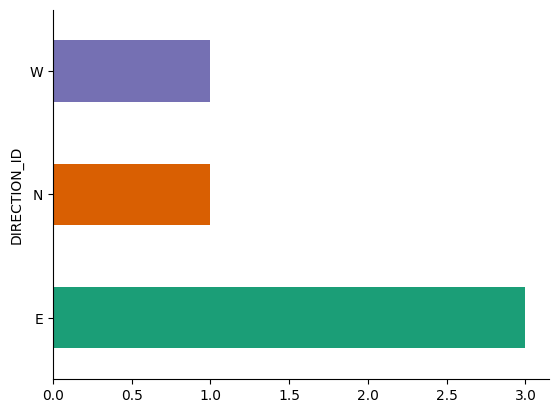

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('DIRECTION_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

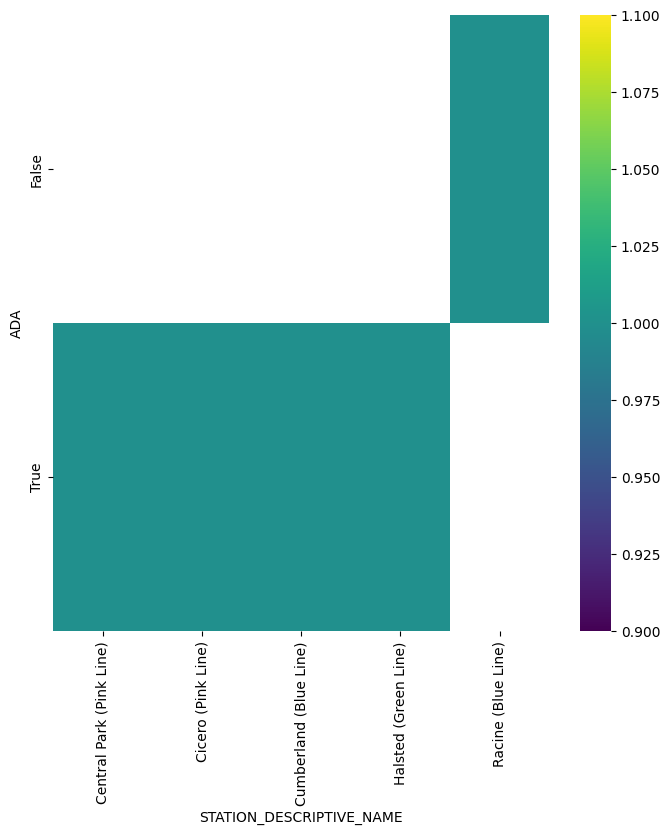

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ADA'].value_counts()
    for x_label, grp in _df_29.groupby('STATION_DESCRIPTIVE_NAME')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('STATION_DESCRIPTIVE_NAME')
_ = plt.ylabel('ADA')

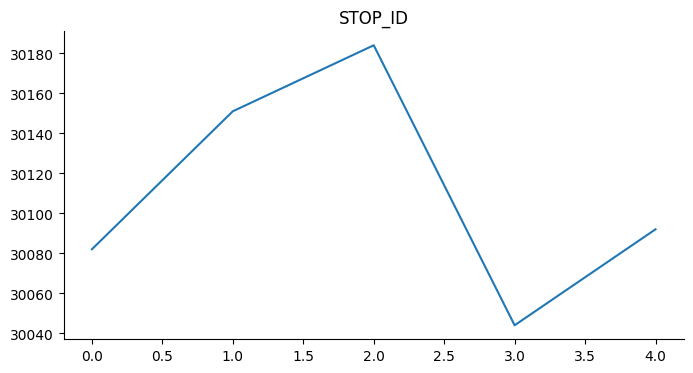

In [ ]:
from matplotlib import pyplot as plt
_df_24['STOP_ID'].plot(kind='line', figsize=(8, 4), title='STOP_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Read the datasets
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/CTA_Ridership.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/CTA_System_Information.csv')

# Merge the datasets on station_id and STOP_ID
merged_df = pd.merge(df, df2, how='left', left_on='station_id', right_on='STOP_ID')

# Display the first few rows of the merged dataset
merged_df.head()


,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,STOP_ID,DIRECTION_ID,STOP_NAME,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import plotly.express as px

# Plotting ridership trends by station name
fig = px.scatter_geo(merged_df,
                     lat=merged_df['Location'].str.split(',').str[0].astype(float),
                     lon=merged_df['Location'].str.split(',').str[1].astype(float),
                     color='avg_weekday_rides',
                     hover_name='stationame',
                     title='CTA Stations with Average Weekday Ridership',
                     labels={'avg_weekday_rides': 'Avg Weekday Ridership'},
                     projection='natural earth')

fig.update_layout(autosize=True)
fig.show()
